# Exploratory Data Analysis on Haberman's survival dataset

#### Reference: https://www.kaggle.com/gilsousa/habermans-survival-data-set

#### Information on dataset
    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### Objective :
To understand survival status of cancer patients for given data in the survival dataset

Number of data points: 304
Number of Attributs: 4

#### Attribute Information:
1.) Age of Patient at time of operation(Numerical)
2.) Patient's year of operation(year-1900, numerical)
3.) Number of positive auxillary nodes detected(Numerical)
4.) Survival Status (class attribute)1 = patient survived 5 years or longer 2 = patient died within 5 years

#### CODE:

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#loading dataset in pandas
column = ['p_age','op_year','auxillary_nodes','survival_status']
data = pd.read_csv('haberman.csv', names = column)

#getting size of dataset
print(data.shape)

(306, 4)


In [3]:
print("data points in class:")
data['survival_status'].value_counts()

data points in class:


1    225
2     81
Name: survival_status, dtype: int64

Obervation: a) dataset contains two classes 1 corresponds to patient survived 5 years or longer after the operation and 2 corresponds to patient died within 5 years of operation
b) 1 has the data of 225 patients that survived after 5years and 2 has the data of 81 patients that died within 5years after operation 

In [4]:
#printing top 5 values of dataset
print(data.head())

   p_age  op_year  auxillary_nodes  survival_status
0     30       64                1                1
1     30       62                3                1
2     30       65                0                1
3     31       59                2                1
4     31       65                4                1


In [5]:
#printing description of dataset
print(data.describe())

            p_age     op_year  auxillary_nodes  survival_status
count  306.000000  306.000000       306.000000       306.000000
mean    52.457516   62.852941         4.026144         1.264706
std     10.803452    3.249405         7.189654         0.441899
min     30.000000   58.000000         0.000000         1.000000
25%     44.000000   60.000000         0.000000         1.000000
50%     52.000000   63.000000         1.000000         1.000000
75%     60.750000   65.750000         4.000000         2.000000
max     83.000000   69.000000        52.000000         2.000000


In [32]:
#classification of data based on survival and death status
data_survived=data.loc[data.survival_status==1]
data_died=data.loc[data.survival_status==2]
data_survived.describe()

,p_age,op_year,auxillary_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [27]:
data_died.describe()

,p_age,op_year,auxillary_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Obervation: 1) according to the above classification the survival chances of patients are  higher who has positive auxillary nodes less than 3 and the chances of death are higher whose positive auxillary nodes are greater than 3.

### Univariate Analysis on the given dataset:

#### Plotting PDF on given dataset(AGE)

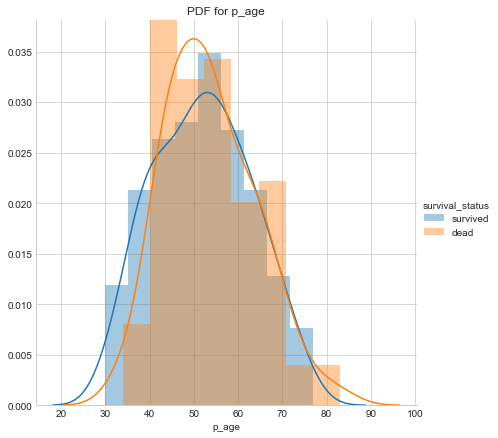

In [28]:
sns.FacetGrid(data, hue='survival_status', size=6).map(sns.distplot, 'p_age').add_legend();
plt.title('PDF for p_age')
plt.show();

Observations: Patients with age <20 has higher chances of survival than patients with age >42 to <55 and age >80 has no chances of survival

#### Plotting PDF on given dataset(Year of operation)

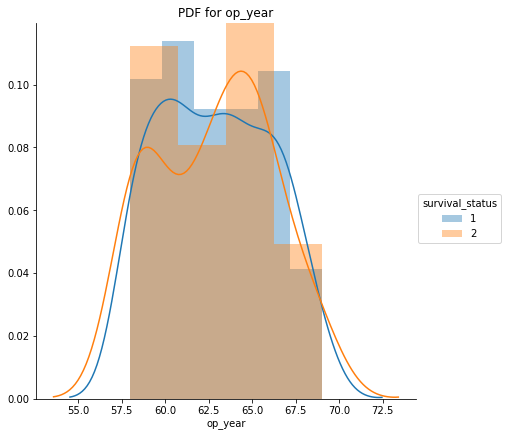

In [9]:
sns.FacetGrid(data, hue='survival_status', size=6).map(sns.distplot, 'op_year').add_legend();
plt.title('PDF for op_year');
plt.show();

Obervations: patients operated during year 1960-62 has more chances of survival rather than patients operated in year 1963-65

#### Plotting PDF on given dataset(auxillary nodes)

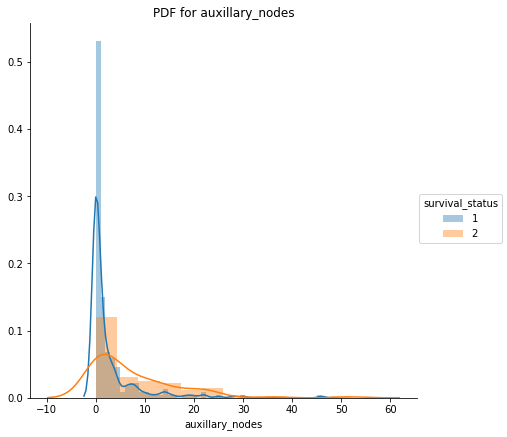

In [11]:
sns.FacetGrid(data, hue='survival_status', size=6).map(sns.distplot, 'auxillary_nodes').add_legend();
plt.title('PDF for auxillary_nodes')
plt.show();

Obervations: Patients within range of auxillary nodes -2 to 3 has highest chances of survival, rather than patients in range >30 and <0

#### Plotting PDF,CDF on given dataset(AGE)

survived patients [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
dead patients [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


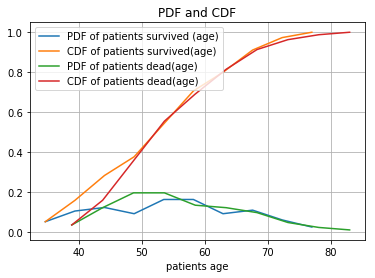

In [16]:
#pdf,cdf plot for survived patients(age)
counts, bin_edges = np.histogram(data_survived.p_age, bins=10, density = True)
pdf = counts/(sum(counts))
print('survived patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patients survived (age)')
plt.plot(bin_edges[1:], cdf, label='CDF of patients survived(age)')

#pdf,cdf plot for dead patients(age)
counts, bin_edges = np.histogram(data_died.p_age, bins=10, density=True)
pdf= counts/(sum(counts))
print('dead patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of patients dead(age)')
plt.plot(bin_edges[1:],cdf,label='CDF of patients dead(age)')

plt.legend()
plt.grid()
plt.title('PDF and CDF')
plt.xlabel('patients age')
plt.show()

#### Plotting PDF,CDF on given dataset(OPERATION YEAR)

survived patients [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
dead patients [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


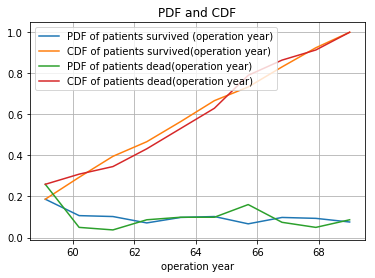

In [18]:
#pdf,cdf plot for survived patients(operation year)
counts, bin_edges = np.histogram(data_survived.op_year, bins=10, density = True)
pdf = counts/(sum(counts))
print('survived patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patients survived (operation year)')
plt.plot(bin_edges[1:], cdf, label='CDF of patients survived(operation year)')

#pdf,cdf plot for dead patients(operation year)
counts, bin_edges = np.histogram(data_died.op_year, bins=10, density=True)
pdf= counts/(sum(counts))
print('dead patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of patients dead(operation year)')
plt.plot(bin_edges[1:],cdf,label='CDF of patients dead(operation year)')

plt.legend()
plt.grid()
plt.title('PDF and CDF')
plt.xlabel('operation year')
plt.show()

survived patients [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
dead patients [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


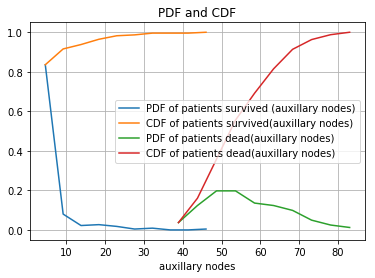

In [19]:
#pdf,cdf plot for survived patients(auxillary nodes)
counts, bin_edges = np.histogram(data_survived.auxillary_nodes, bins=10, density = True)
pdf = counts/(sum(counts))
print('survived patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patients survived (auxillary nodes)')
plt.plot(bin_edges[1:], cdf, label='CDF of patients survived(auxillary nodes)')

#pdf,cdf plot for dead patients(auxillary nodes)
counts, bin_edges = np.histogram(data_died.p_age, bins=10, density=True)
pdf= counts/(sum(counts))
print('dead patients',pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of patients dead(auxillary nodes)')
plt.plot(bin_edges[1:],cdf,label='CDF of patients dead(auxillary nodes)')

plt.legend()
plt.grid()
plt.title('PDF and CDF')
plt.xlabel('auxillary nodes')
plt.show()

#### Box plot analysis

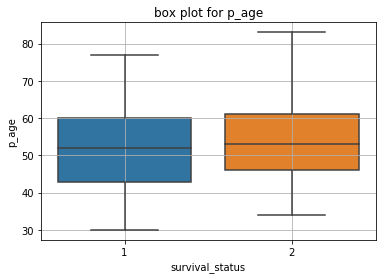

In [16]:
#box plot using patients age
sns.boxplot(x='survival_status', y='p_age', data=data)
plt.title('box plot for p_age');
plt.grid();
plt.show()

Observation: patients below age 30 has survived >5 years rather than patients above age 80

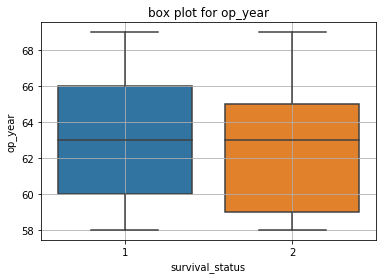

In [17]:
#box plot using operation year
sns.boxplot(x='survival_status', y='op_year',data=data)
plt.title('box plot for op_year');
plt.grid()
plt.show()

Observation: maximum no of patients survived who were operated in year 1960-1966. 75% of patients survived >5 years who were operated in year 1966 rather than patients in 1965

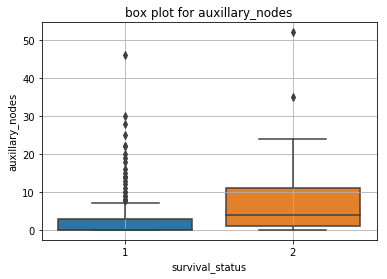

In [18]:
#box plot using auxillary nodes
sns.boxplot(x='survival_status', y='auxillary_nodes', data=data)
plt.title('box plot for auxillary_nodes')
plt.grid()
plt.show()

observation: Patients with auxillary nodes <3 has survived >5years while patients with auxillary node >3

#### Violin plots

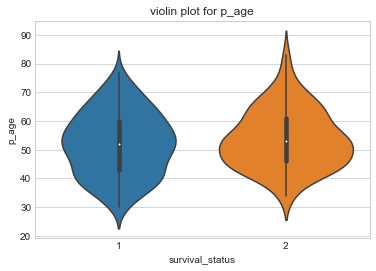

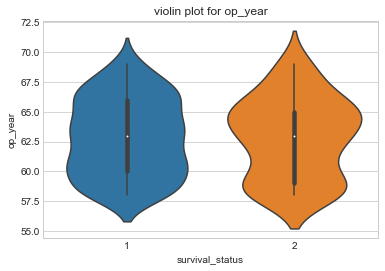

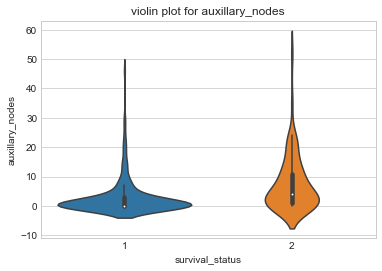

In [21]:
sns.set_style('whitegrid')
sns.violinplot(x='survival_status',y='p_age',data=data, size=5)
plt.title('violin plot for p_age')
plt.show()

sns.violinplot(x='survival_status',y='op_year',data=data, size=5)
plt.title('violin plot for op_year')
plt.show()

sns.violinplot(x='survival_status',y='auxillary_nodes',data=data, size=5)
plt.title('violin plot for auxillary_nodes')
plt.show()

Observations: 1) patients with age more than age >80 has died <5 year after operation. 2) 75% patients has survived >5 year operated in year 1960-66 3) with auxillary nodes >3 the sruvival rate is very less

### Bivariate analysis

#### 2D scatter plot

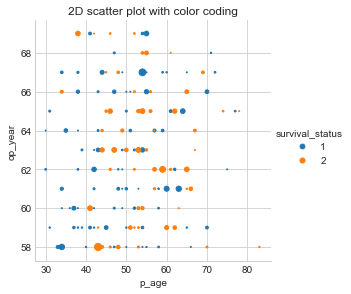

In [25]:
#2-D scatter plot with color-coding
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='survival_status',size=4).map(plt.scatter,'p_age','op_year','auxillary_nodes').add_legend();
plt.title('2D scatter plot with color coding')
plt.show()

#### pair plots

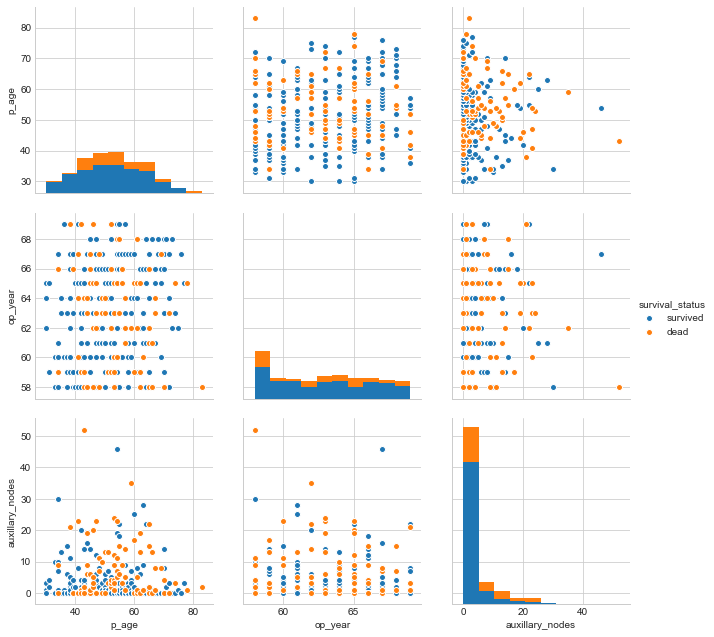

In [33]:
plt.close();
data['survival_status'] = data['survival_status'].apply(lambda x: 'survived' if x == 1 else 'dead')
sns.set_style("whitegrid")
sns.pairplot(data, hue="survival_status", size=3)
plt.show()

Observation: patients age <35 with any auxillary node survived more than 5years where patients with age >75 survived <5 years irrespective of any auxillary nodes
. patients age and aurxillary nodes cannot define the survival status of patients


### Conclusion

##### ~ patients age and auxillary nodes cannot define the survival status.

##### ~ patients with age <40 are more likely to survive.

##### ~ patients with auxillary nodes >4 are likely to be dead in <5 years.